# Analyzing the Data

Analyzing the data is crucial before data cleaning or pre-processing the data to get a rough idea of what's there in the data set.

### Importing necessary libraries

In [1]:
#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

### Importing the data repo from UCL to preprocess and checking if the data is available to print (default code)

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### Displaying the available data in X and y

In [4]:
X #contain features

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [5]:
y # contains target

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


### Combining the feature and target data to a single column for a single dataframe

In [6]:
# Assigning X table to a different variable
df_census_data = X

# Creating a new column to bind the income column
df_census_data["target"] = y
df_census_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
### Changing the columns names before analyzing the data for the consistency

In [8]:
# Define a dictionary mapping old column names to new column names
new_column_names = {
    "workclass": "work_class",
    "education-num": "education_num",
    "marital-status":  "marital_status",
    "capital-gain": "capital_gain",
    "capital-loss": "capital_loss",
    "hours-per-week": "hours_per_week",
    "native-country": "native_country",
    "target": "income"
}

# Rename columns using the rename() method
df_census_data = df_census_data.rename(columns=new_column_names)

### Standardizing the data in the data frame

In [9]:
# Convert all categorical variables to lowercase and remove leading/trailing whitespaces
categorical_columns = ['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex']

for column in categorical_columns:
    df_census_data[column] = df_census_data[column].str.lower().str.strip()

In [10]:
# Checking if the columns are changed properly in the data frame
df_census_data

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,United-States,<=50K
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,United-States,<=50K
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,United-States,<=50K
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,United-States,<=50K
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,private,215419,bachelors,13,divorced,prof-specialty,not-in-family,white,female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,hs-grad,9,widowed,NaN,other-relative,black,male,0,0,40,United-States,<=50K.
48839,38,private,374983,bachelors,13,married-civ-spouse,prof-specialty,husband,white,male,0,0,50,United-States,<=50K.
48840,44,private,83891,bachelors,13,divorced,adm-clerical,own-child,asian-pac-islander,male,5455,0,40,United-States,<=50K.


### Checking the shape of the dataframe

In [11]:
# Checking the data frame shape
df_census_data.shape

(48842, 15)

In [12]:
# Checking what type of data is in the data frame in each column
df_census_data.dtypes

age                int64
work_class        object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

### Checking the number of null values in each column 

Checking for null values and cleaning it is important to prevent bias, maintain data intergrity and improve the model performance.

In [13]:
null_column_values = df_census_data.isnull().sum()
null_column_values

age                 0
work_class        963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

### Checking the unique data in each column and it's count

Checking the unique value in a dataset is important to get an idea about the dataset what type of variable are the in the data set you have.

In [14]:
for column in df_census_data.columns:
    unique_values = df_census_data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("Unique values in each column ->", str(np.size(unique_values)))
    print()

Unique values in column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
Unique values in each column -> 74

Unique values in column 'work_class':
['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov' '?'
 'self-emp-inc' 'without-pay' 'never-worked' nan]
Unique values in each column -> 10

Unique values in column 'fnlwgt':
[ 77516  83311 215646 ... 173449  89686 350977]
Unique values in each column -> 28523

Unique values in column 'education':
['bachelors' 'hs-grad' '11th' 'masters' '9th' 'some-college' 'assoc-acdm'
 'assoc-voc' '7th-8th' 'doctorate' 'prof-school' '5th-6th' '10th'
 '1st-4th' 'preschool' '12th']
Unique values in each column -> 16

Unique values in column 'education_num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique values in each column -> 16

Unique values in c

In [15]:
for column in df_census_data.columns:
    unique_values_counts = df_census_data[column].value_counts()
    print(f"Unique values and their counts in column '{column}':")
    print(unique_values_counts)
    print()

Unique values and their counts in column 'age':
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

Unique values and their counts in column 'work_class':
work_class
private             33906
self-emp-not-inc     3862
local-gov            3136
state-gov            1981
?                    1836
self-emp-inc         1695
federal-gov          1432
without-pay            21
never-worked           10
Name: count, dtype: int64

Unique values and their counts in column 'fnlwgt':
fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
286983     1
185942     1
234220     1
214706     1
350977     1
Name: count, Length: 28523, dtype: int64

Unique values and their counts in column 'education':
education
hs-grad         15784
some-college    10878
bachelors        8025
masters          2657
assoc-voc        2061
11th             1812
assoc-acdm       1601


### Plotting the data

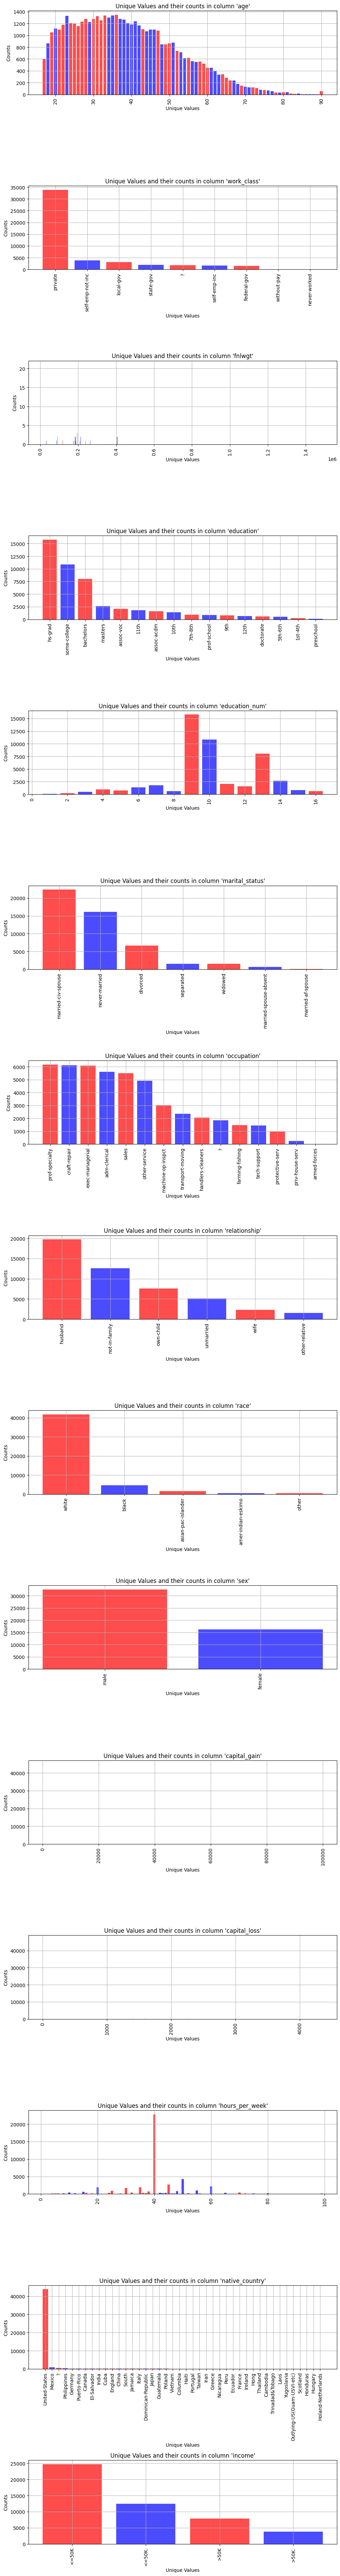

In [16]:
num_rows = len(df_census_data.columns)
# print(num_rows)
fig, axs = plt.subplots(num_rows, 1, figsize=(10, 5*num_rows))

for i, column in enumerate(df_census_data.columns):
    unique_values_counts = df_census_data[column].value_counts()
    axs[i].bar(unique_values_counts.index, unique_values_counts.values, color=["Red", "Blue"], alpha = 0.7)
    axs[i].set_title(f"Unique Values and their counts in column '{column}'")
    axs[i].set_xlabel("Unique Values")
    axs[i].set_ylabel("Counts")
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=90) 

plt.tight_layout()
plt.show()


### Describing the census data

In [17]:
df_census_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education_num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital_gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital_loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours_per_week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


### Finding co-relation of the dataframe and column

In [18]:
# Label encoding for the data frame temporarily to find the correlation between each column
from sklearn.preprocessing import LabelEncoder

# Defining categorical columns
categorical_columns = ['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

# Assigning the census data frame for another variable temporarily
temp_df = df_census_data.copy()

label_encoder = LabelEncoder()

for column in categorical_columns:
    temp_df[column] = label_encoder.fit_transform(temp_df[column]) 

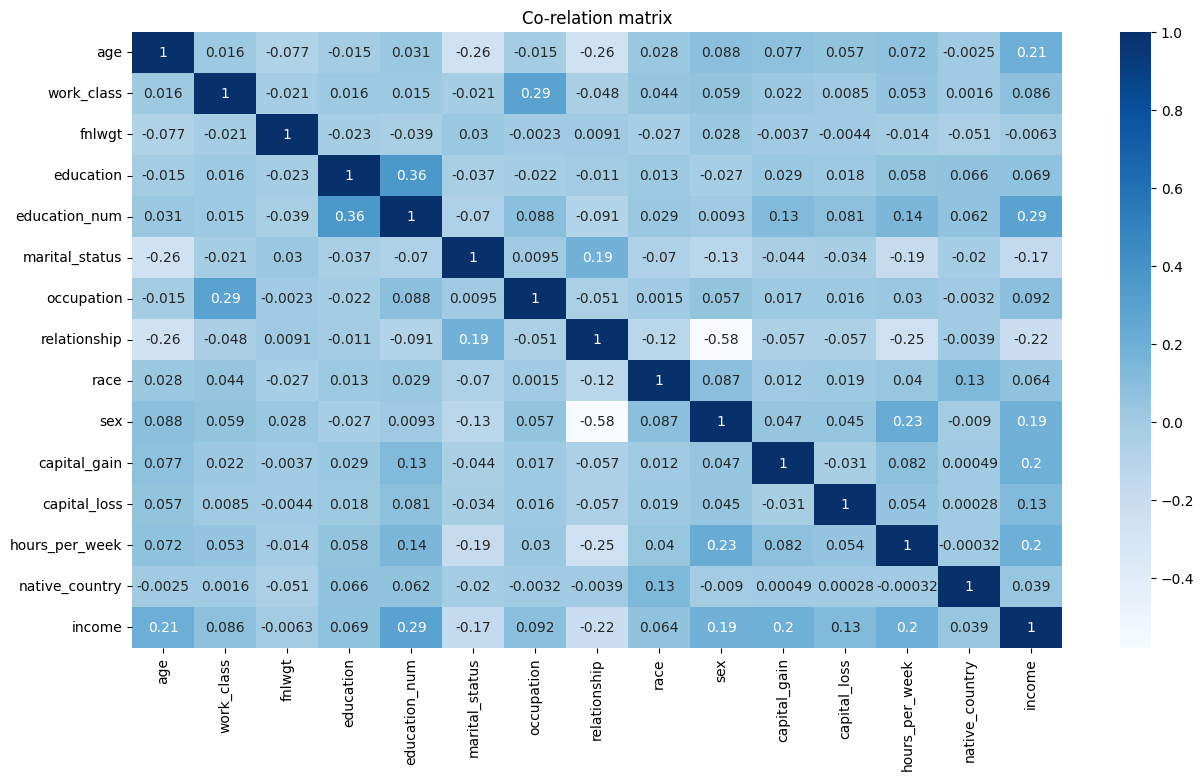

In [19]:
# Plot correlation heatmap
plt.figure(figsize=(15, 8))
plt.title("Co-relation matrix")
# In here plotted the pearson co-relation because to find the linear connection between two columns 
sns.heatmap(temp_df.corr(method='pearson'), annot=True, cmap="Blues")
plt.show()

In the above co-relation matrix that mapped on a heat map show there is no strong relationship between each column with the target. For a strong co-relation to be present it should be greater than 0.65.

### Plotting against one another

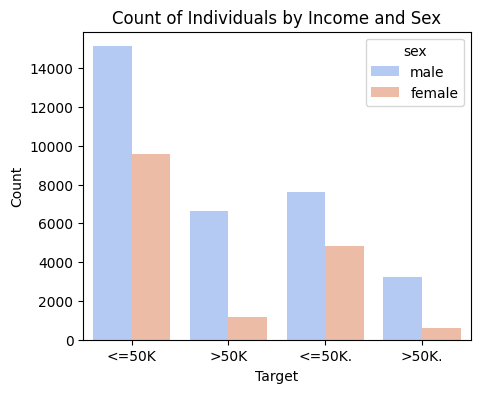

In [20]:
plt.figure(figsize=(5, 4))
sns.countplot(x="income", hue="sex", palette="coolwarm", data=df_census_data)
plt.title("Count of Individuals by Income and Sex")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


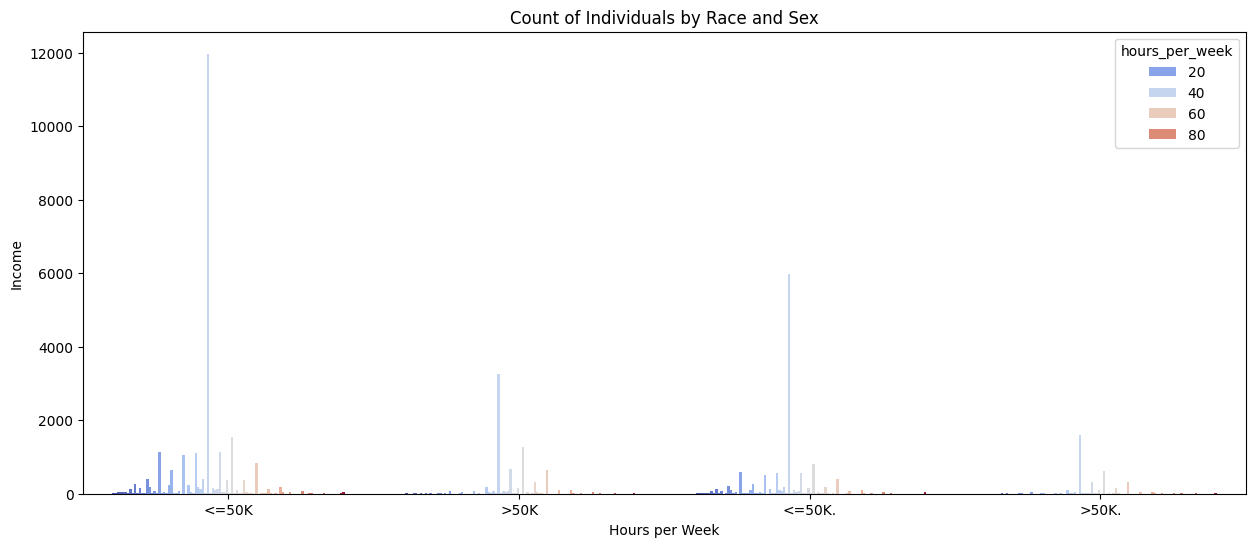

In [21]:
plt.figure(figsize=(15, 6))
sns.countplot(x="income", hue="hours_per_week", palette=("coolwarm"), data=df_census_data)
plt.title("Count of Individuals by Race and Sex")
plt.xlabel("Hours per Week")
plt.ylabel("Income")
plt.show()

### Data Cleaning

### Checking if there are duplicate rows

It's essential to check if there is duplicate data in a data repository before feeding it to a model. If there are duplicate data (here we are considering duplicate rows) it might lead to a reduction in data quality which will harm the data integrity. Also, this might increase the computational efficiency by removing duplicate datasets because it reduces the data size.

Feeding duplicate data to the model will cause the model to overfit, biased estimation, and decrease generalization ability.

In [22]:
# Checking for duplicate data rows
df_census_data.duplicated().sum()

29

In [23]:
# Inplace true modifies the original data frame
df_census_data.drop_duplicates(inplace=True)

In [24]:
# Checking the shape of the data frame after removing the duplicate rows.
df_census_data.shape

(48813, 15)

### Manipulating the target column for correct labels

Identified that there are 4 columns in the target column of the data frame when analyzing the data where there should only 2 columns as income ">=50k" and "<50k" 

In [25]:
df_census_data.income = df_census_data.income.replace('<=50K.', "<=50K") 

In [26]:
df_census_data.income = df_census_data.income.replace('>50K.', ">50K") 

In [27]:
# Checking if there are only two target values.
df_census_data.income.unique()

array(['<=50K', '>50K'], dtype=object)

### Finding the distribution of data sets of each columns.

In [28]:
# # Dividing the data frame into two classes
# income_less_or_equal_50k = df_census_data[df_census_data['income'] == '<=50K']
# income_greater_50k = df_census_data[df_census_data['income'] == '>50K']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


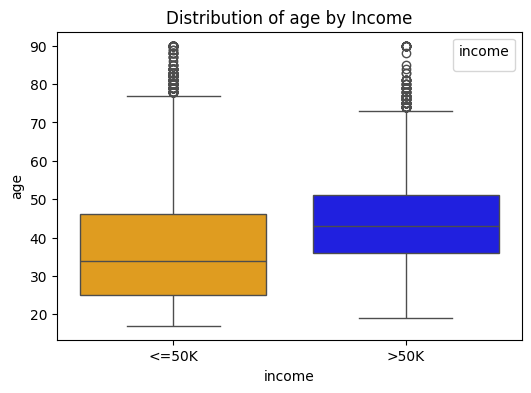

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


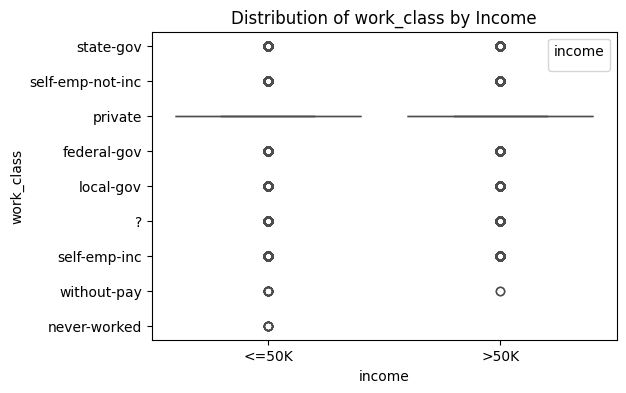

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


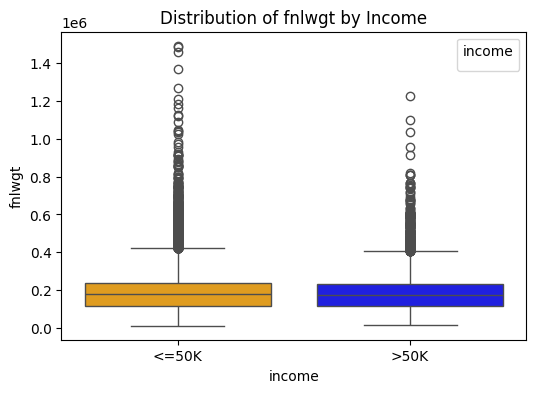

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


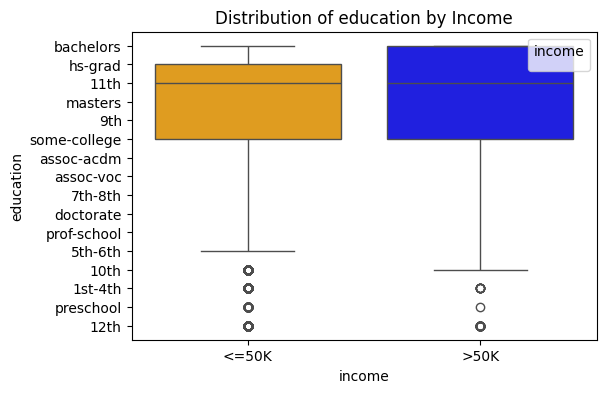

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


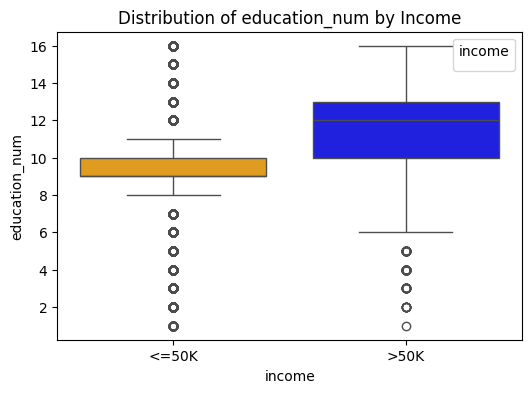

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


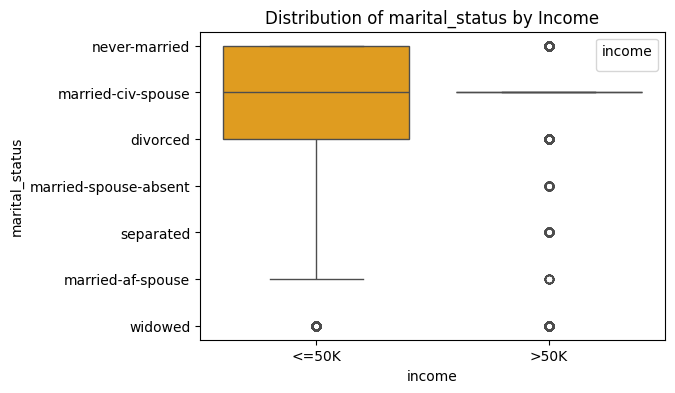

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


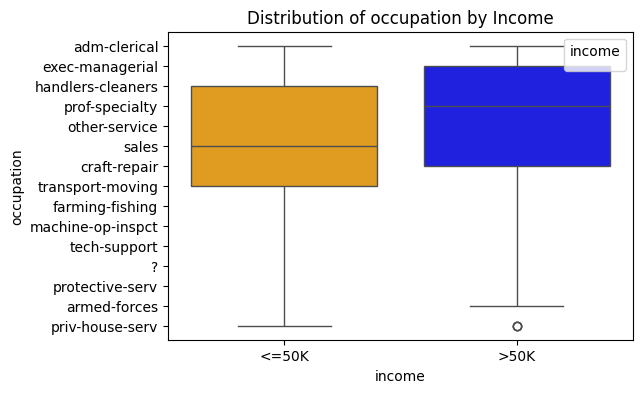

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


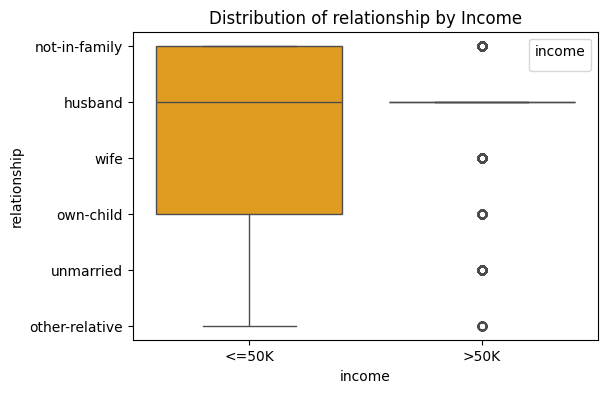

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


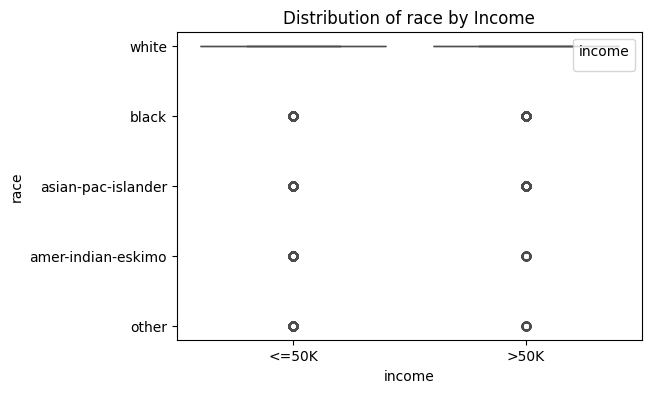

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


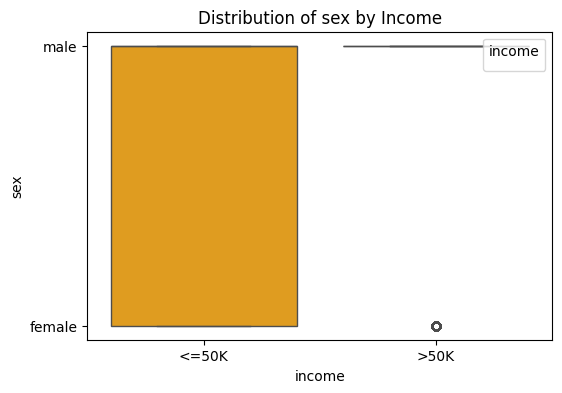

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


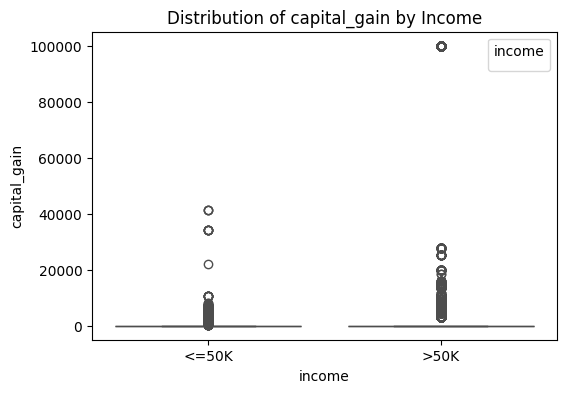

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


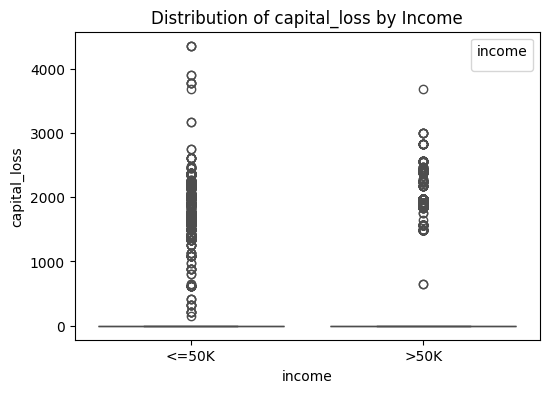

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


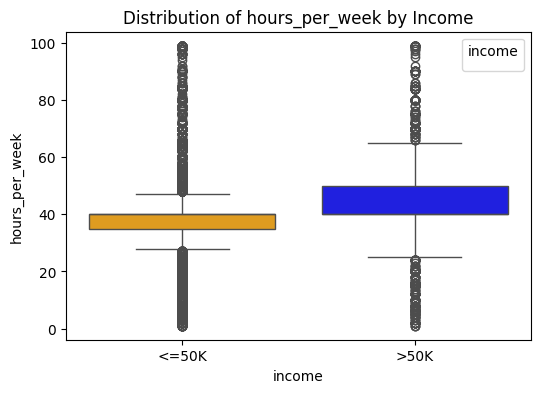

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


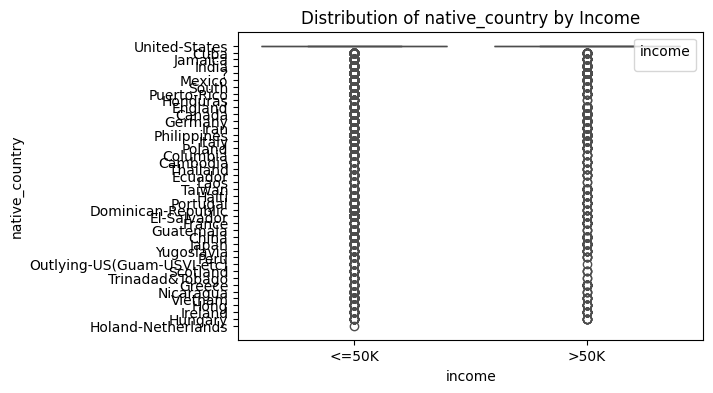

In [29]:
# Define colors for income groups
under_or_equal_50K_color = 'orange'
over_50K_color = 'blue'

# List of columns to create box plots for
columns_of_interest = ["age", "work_class", "fnlwgt", "education", "education_num", "marital_status", "occupation", 
                       "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country"]

# Create box plots for each column
for column in columns_of_interest:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_census_data[column], x=df_census_data["income"], hue=df_census_data["income"], 
                palette={'>50K': over_50K_color, '<=50K': under_or_equal_50K_color})
    plt.title(f"Distribution of {column} by Income")
    plt.ylabel(column)
    plt.xlabel("income")
    plt.legend(title='income', loc='upper right')
    plt.show()


Some of the distribution of data couldn't be well seen due to less amount of the spread of the data.

### Filling the values

#### Checking the mode of the each column in the dataframe

Filling up the null values with the mode so it can preserve the data distribution and can minimal impact in statistics. (type of Imputation)

In [30]:
df_census_data.mode()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,36,private,203488,hs-grad,9,married-civ-spouse,prof-specialty,husband,white,male,0,0,40,United-States,<=50K


#### Filling all the NaN with ?

In [31]:
df_census_data = df_census_data.fillna("?")

#### For work class column

In [32]:
df_census_data["work_class"] = df_census_data["work_class"].replace("?", "private")

In [33]:
df_census_data["work_class"].unique()

array(['state-gov', 'self-emp-not-inc', 'private', 'federal-gov',
       'local-gov', 'self-emp-inc', 'without-pay', 'never-worked'],
      dtype=object)

#### For occupation column

In [34]:
df_census_data["occupation"] = df_census_data["occupation"].replace("?", "prof-specialty")

In [35]:
df_census_data["occupation"].unique()

array(['adm-clerical', 'exec-managerial', 'handlers-cleaners',
       'prof-specialty', 'other-service', 'sales', 'craft-repair',
       'transport-moving', 'farming-fishing', 'machine-op-inspct',
       'tech-support', 'protective-serv', 'armed-forces',
       'priv-house-serv'], dtype=object)

#### For native country column

In [36]:
# df_census_data["native_country"] = df_census_data["native_country"].fillna("United-States")
df_census_data["native_country"] = df_census_data["native_country"].replace("?", "United-States")

In [37]:
df_census_data["native_country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [38]:
# Checking if there are still null values.
df_census_data.isnull().sum()

age               0
work_class        0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Feature Engineering

#### For education

In [39]:
df_census_data["education"].unique()

array(['bachelors', 'hs-grad', '11th', 'masters', '9th', 'some-college',
       'assoc-acdm', 'assoc-voc', '7th-8th', 'doctorate', 'prof-school',
       '5th-6th', '10th', '1st-4th', 'preschool', '12th'], dtype=object)

In [40]:
df_census_data.education = df_census_data.education.replace(['preschool', '1st-4th', '5th-6th','7th-8th', '9th', '10th', '11th', '12th'], "school")

In [41]:
df_census_data.education = df_census_data.education.replace('hs-grad', "high-school") 

In [42]:
df_census_data["education"].unique()

array(['bachelors', 'high-school', 'school', 'masters', 'some-college',
       'assoc-acdm', 'assoc-voc', 'doctorate', 'prof-school'],
      dtype=object)

#### For marital status

In [43]:
df_census_data["marital_status"].unique()

array(['never-married', 'married-civ-spouse', 'divorced',
       'married-spouse-absent', 'separated', 'married-af-spouse',
       'widowed'], dtype=object)

In [44]:
df_census_data.marital_status = df_census_data.marital_status.replace(['married-civ-spouse', 'married-spouse-absent', 'married-af-spouse'], "married")

In [45]:
df_census_data["marital_status"].unique()

array(['never-married', 'married', 'divorced', 'separated', 'widowed'],
      dtype=object)

### Handling Outliers

Identify potential outliers in the data frame for individuals with an income greater than 50K based on the distribution of data in different columns in the data frame within this subgroup. Outliers falling below the lower bound or above the upper bound will be removed.

interquartile range -> (IQR)

Only the upper bound values are removed in here.

#### For age

In [46]:
df_census_data.shape

(48813, 15)

In [47]:
all_the_ages =  df_census_data['age'].unique()
all_the_ages.sort()
print(all_the_ages)

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90]


##### For the age over 50K

In [48]:
age_over_50K = df_census_data[df_census_data['income'] == '>50K']['age']

# Quartile 1
q1 = age_over_50K.quantile(0.25)
# Quuartile 3
q3 = age_over_50K.quantile(0.75)
iqr = q3 - q1

# Calculating the lower and upper bound limit
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower bound:", lower_bound, "   |||||||||||||   Upper bound:", upper_bound)

Lower bound: 13.5    |||||||||||||   Upper bound: 73.5


In [49]:
# Checking the number of outliers in the age and removing them
outliers_over_50K_for_age = df_census_data[(df_census_data['income'] == '>50K') & (df_census_data['age'] > upper_bound)]
print("No of outliers in the data frame(rows):", len(outliers_over_50K_for_age))

No of outliers in the data frame(rows): 90


In [50]:
# Dropping the outlier
df_census_data = df_census_data.drop(df_census_data[(df_census_data['income'] == '>50K') & (df_census_data['age'] > upper_bound)].index)

In [51]:
outliers_over_50K_for_age['age'].unique()

array([76, 75, 90, 78, 79, 74, 77, 80, 84, 81, 83, 85, 88], dtype=int64)

In [52]:
df_census_data[df_census_data['income'] == '>50K']['age'].unique()

array([52, 31, 42, 37, 30, 40, 43, 56, 54, 57, 47, 50, 53, 49, 29, 44, 34,
       48, 32, 38, 45, 51, 28, 58, 35, 36, 41, 64, 33, 61, 24, 55, 59, 62,
       25, 46, 63, 60, 67, 65, 39, 71, 27, 26, 22, 72, 66, 23, 70, 68, 69,
       21, 19, 73, 20], dtype=int64)

##### For the age under 50K

In [53]:
age_under_or_equal_50K = df_census_data[df_census_data['income'] == '<=50K']['age']

# Quartile 1
q1 = age_under_or_equal_50K.quantile(0.25)
# Quuartile 3
q3 = age_under_or_equal_50K.quantile(0.75)
iqr = q3 - q1

# Calculating the lower and upper bound limit
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower bound:", lower_bound, "   |||||||||||||   Upper bound:", upper_bound)


Lower bound: -6.5    |||||||||||||   Upper bound: 77.5


In [54]:
# Checking the number of outliers in the age and removing them
outliers_under_or_equal_50K_for_age = df_census_data[(df_census_data['income'] == '<=50K') & (df_census_data['age'] > upper_bound)]
print("No of outliers in the data frame(rows):", len(outliers_under_or_equal_50K_for_age))

No of outliers in the data frame(rows): 206


In [55]:
# Removing outliers for age
df_census_data = df_census_data.drop(df_census_data[(df_census_data['income'] == '<=50K') & (df_census_data['age'] > upper_bound)].index)

In [56]:
outliers_under_or_equal_50K_for_age['age'].unique()

array([79, 90, 80, 81, 78, 88, 82, 83, 84, 85, 86, 87, 89], dtype=int64)

In [57]:
df_census_data[df_census_data['income'] == '<=50K']['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 23, 32, 34, 25, 54, 35, 43, 59, 19, 20,
       45, 30, 22, 48, 21, 31, 24, 44, 41, 29, 18, 47, 46, 36, 27, 40, 67,
       52, 33, 57, 17, 42, 56, 55, 61, 70, 64, 71, 68, 66, 26, 60, 75, 65,
       58, 77, 62, 76, 63, 51, 72, 74, 69, 73], dtype=int64)

In [58]:
df_census_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48517.0,38.385102,13.326415,17.0,28.0,37.0,47.0,77.0
fnlwgt,48517.0,189862.524373,105685.337027,12285.0,117606.0,178344.0,237865.0,1490400.0
education_num,48517.0,10.082157,2.562439,1.0,9.0,10.0,12.0,16.0
capital_gain,48517.0,1069.720758,7426.731483,0.0,0.0,0.0,0.0,99999.0
capital_loss,48517.0,87.278727,401.703780,0.0,0.0,0.0,0.0,4356.0
hours_per_week,48517.0,40.500794,12.324192,1.0,40.0,40.0,45.0,99.0


In [59]:
df_census_data.shape

(48517, 15)

#### For Capital Gain

Capital gain is increase in the value of a capital asset when it is sold and there are not everyone who is selling there asset and fininding an extensive amount of money.

In [60]:
sorted_capital_gain = df_census_data['capital_gain'].unique()
sorted_capital_gain.sort()
print(sorted_capital_gain)

[    0   114   401   594   914   991  1055  1086  1111  1151  1173  1264
  1409  1424  1455  1471  1506  1639  1731  1797  1831  1848  2009  2036
  2050  2062  2105  2174  2176  2202  2228  2290  2329  2346  2354  2387
  2407  2414  2463  2538  2580  2597  2635  2653  2829  2885  2907  2936
  2961  2964  2977  2993  3103  3137  3273  3325  3411  3418  3432  3456
  3464  3471  3674  3781  3818  3887  3908  3942  4064  4101  4386  4416
  4508  4650  4687  4787  4865  4931  4934  5013  5060  5178  5455  5556
  5721  6097  6360  6418  6497  6514  6612  6723  6767  6849  7298  7430
  7443  7688  7896  7978  8614  9386  9562 10520 10566 10605 11678 13550
 14084 14344 15020 15024 15831 18481 20051 22040 25124 25236 27828 34095
 41310 99999]


In [61]:
capital_gain = df_census_data['capital_gain']

non_zero_capital_gain = capital_gain[capital_gain != 0]

# Quartile 1
q1 = non_zero_capital_gain.quantile(0.25)
# Quuartile 3
q3 = non_zero_capital_gain.quantile(0.75)
iqr = q3 - q1

# Calculating the lower and upper bound limit
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower bound:", lower_bound, "   |||||||||||||   Upper bound:", upper_bound)

Lower bound: -11797.5    |||||||||||||   Upper bound: 28758.5


In [62]:
# Checking the number of outliers in the age and removing them
outliers_for_capital_gain = df_census_data[(df_census_data['capital_gain'] > upper_bound)]
print("No of outliers in the data frame(rows):", len(outliers_for_capital_gain))

No of outliers in the data frame(rows): 250


In [63]:
# Removing outliers for capital gain
df_census_data = df_census_data.drop(df_census_data[(df_census_data['capital_gain'] > upper_bound)].index)

In [64]:
df_census_data.shape

(48267, 15)

#### For hours per week

Not everyone will be hardworking every day of the week, those who work more than the average will be classified as outliers and removed but there can be people who are not going to work at all

In [65]:
sorted_hours_per_week = df_census_data['hours_per_week'].unique()
sorted_hours_per_week.sort()
print(sorted_hours_per_week)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72 73
 74 75 76 77 78 79 80 81 82 84 85 86 87 88 89 90 91 92 94 95 96 97 98 99]


In [66]:
hours_per_week = df_census_data['hours_per_week']

non_zero_capital_gain = hours_per_week[hours_per_week != 0]

# Quartile 1
q1 = hours_per_week.quantile(0.25)
# Quuartile 3
q3 = hours_per_week.quantile(0.75)
iqr = q3 - q1

# Calculating the lower and upper bound limit
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower bound:", lower_bound, "   |||||||||||||   Upper bound:", upper_bound)

Lower bound: 32.5    |||||||||||||   Upper bound: 52.5


In [67]:
# Checking the number of outliers in the age and removing them
outliers_for_hours_per_week = df_census_data[(df_census_data['hours_per_week'] > upper_bound)]
print("No of outliers in the data frame(rows):", len(outliers_for_hours_per_week))

No of outliers in the data frame(rows): 5103


Removing of outliers_for_hours_per_week will be a major issue to to high amount of rows will be getting removed might lead to less amount of data to train and test

### Feature Reduction

In [68]:
# Assigning the census data frame for another variable temporarily
temp_df = df_census_data.copy()

label_encoder = LabelEncoder()

for column in categorical_columns:
    temp_df[column] = label_encoder.fit_transform(temp_df[column]) 

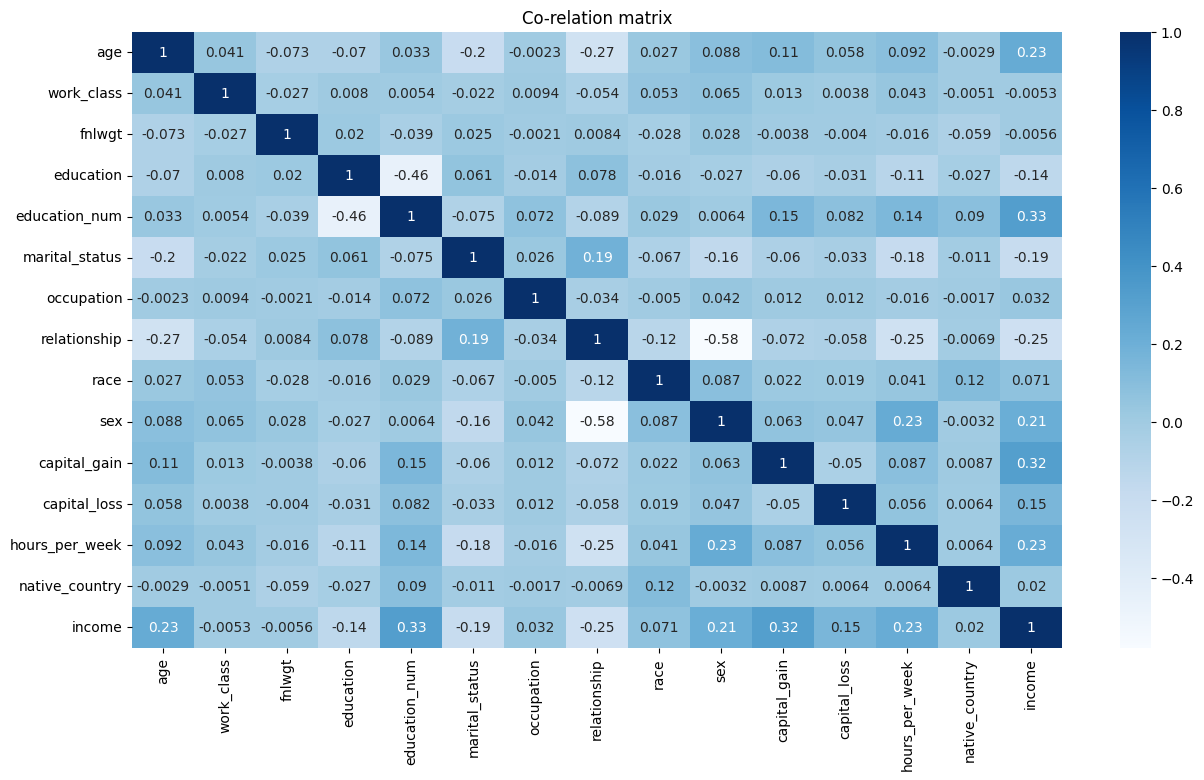

In [69]:
# Plot correlation heatmap
plt.figure(figsize=(15, 8))
plt.title("Co-relation matrix")
# In here plotted the pearson co-relation because to find the linear connection between two columns 
sns.heatmap(temp_df.corr(method='pearson'), annot=True, cmap="Blues")
plt.show()

In [70]:
correlation_matrix = temp_df.corr()

# Extract correlation with the target variable
correlation_with_income = correlation_matrix['income'].sort_values(ascending=False)

print(correlation_with_income)

income            1.000000
education_num     0.326448
capital_gain      0.315457
age               0.233519
hours_per_week    0.225038
sex               0.213351
capital_loss      0.150966
race              0.070906
occupation        0.031890
native_country    0.020156
work_class       -0.005257
fnlwgt           -0.005619
education        -0.144319
marital_status   -0.190873
relationship     -0.251949
Name: income, dtype: float64


In [71]:
# Since there are no direct co-relation between fnlwgt and income and also because of the negative value, decided to drop the column

In [72]:
df_census_data.drop(columns = ["fnlwgt"],inplace = True)

### Standard Scaling

In [73]:
columns = ["work_class", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]

In [74]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over each categorical column and encode its values
for column in categorical_columns:
    df_census_data[column] = label_encoder.fit_transform(df_census_data[column])


In [75]:
df_census_data.head()

,age,work_class,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,2,13,2,0,1,4,1,2174,0,40,38,0
1,50,5,2,13,1,3,0,4,1,0,0,13,38,0
2,38,3,4,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,7,1,5,0,2,1,0,0,40,38,0
4,28,3,2,13,1,9,5,2,0,0,0,40,4,0


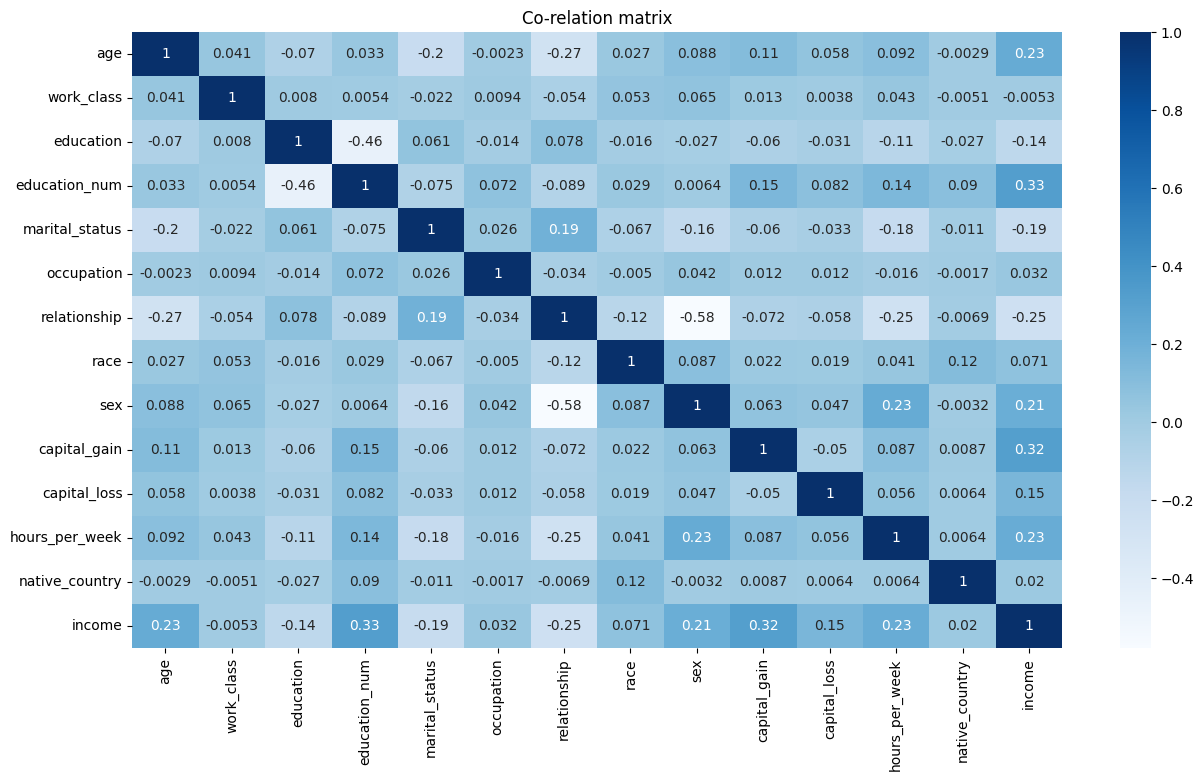

In [76]:
# Plot correlation heatmap
plt.figure(figsize=(15, 8))
plt.title("Co-relation matrix")
# In here plotted the pearson co-relation because to find the linear connection between two columns 
sns.heatmap(df_census_data.corr(method='pearson'), annot=True, cmap="Blues")
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply Standardization to the specified columns
# for column in columns:
df_census_data[columns] = scaler.fit_transform(df_census_data[columns])

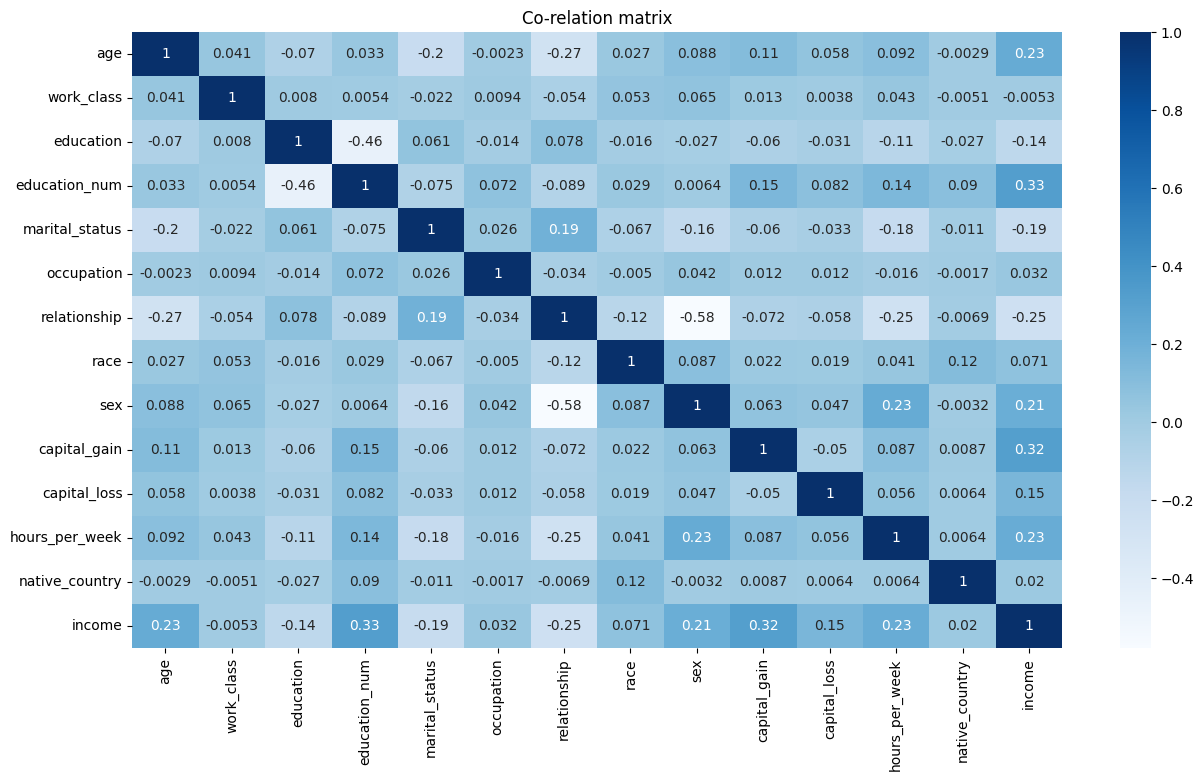

In [78]:
# Plot correlation heatmap
plt.figure(figsize=(15, 8))
plt.title("Co-relation matrix")
# In here plotted the pearson co-relation because to find the linear connection between two columns 
sns.heatmap(df_census_data.corr(method='pearson'), annot=True, cmap="Blues")
plt.show()

### Converting the income column into binary

In [79]:
df_census_data.income = df_census_data.income.replace('<=50K', "0") # Assuming <=50K as 0 for the model input

In [80]:
df_census_data.income = df_census_data.income.replace('>50K', "1") # Assuming >50K as 1 for the model input

### Save the dataframe to a CSV file

In [81]:
df_census_data.to_csv('adult.csv', index=False)